In [216]:
%matplotlib inline
import numpy as np

In [6]:
N = 100
D = 2

In [8]:
X = np.random.randn(N, D)

In [11]:
np.shape(X)

(100, 2)

In [37]:
# 常數項
ones = np.array([[1]*N]).T


In [39]:
ones.shape

(100, 1)

In [40]:
Xb = np.concatenate([ones, X], axis=1)

In [41]:
Xb

array([[  1.00000000e+00,   9.93751891e-01,   6.66752005e-01],
       [  1.00000000e+00,   3.77411084e-01,  -2.75911808e-01],
       [  1.00000000e+00,  -1.06539594e+00,   6.78236568e-01],
       [  1.00000000e+00,   5.85289875e-01,   3.50537352e-01],
       [  1.00000000e+00,   3.73202539e-04,  -7.85370598e-01],
       [  1.00000000e+00,  -5.17690595e-01,  -6.00503426e-01],
       [  1.00000000e+00,   2.50419729e-01,  -1.97391658e-02],
       [  1.00000000e+00,   9.35649812e-01,   1.58260119e+00],
       [  1.00000000e+00,  -1.39902635e+00,   4.40801514e-01],
       [  1.00000000e+00,  -1.56059368e+00,   2.58841172e-01],
       [  1.00000000e+00,   1.20245547e+00,  -5.27449027e-01],
       [  1.00000000e+00,   5.68798233e-01,   1.27989234e+00],
       [  1.00000000e+00,  -1.94083376e+00,   7.85364277e-01],
       [  1.00000000e+00,  -5.47674725e-01,  -4.61496228e-01],
       [  1.00000000e+00,   1.15682927e+00,  -6.11882423e-01],
       [  1.00000000e+00,  -1.04944631e+00,   1.5376988

In [42]:
w = np.random.randn(D + 1) # 變項數 + 常數項

In [43]:
z = Xb.dot(w)

In [46]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [47]:
print sigmoid(z)

[ 0.61328574  0.74383751  0.04007962  0.57682934  0.78847139  0.51872257
  0.59493879  0.21750332  0.03432538  0.03574312  0.95098277  0.20056885
  0.00735268  0.44360092  0.95418845  0.09892986  0.0982883   0.94766742
  0.8122598   0.18244376  0.09234318  0.9282826   0.82604925  0.02824273
  0.66069155  0.963264    0.26514425  0.82200617  0.49113316  0.14211567
  0.31355269  0.53129842  0.95214559  0.06208669  0.19994046  0.99111928
  0.66189279  0.22062725  0.87696746  0.07912619  0.92418918  0.30515048
  0.20331284  0.56609563  0.98300348  0.14598389  0.2545591   0.1832254
  0.10485619  0.47533004  0.04937774  0.34183509  0.99149483  0.00262529
  0.87151654  0.60254037  0.16713285  0.96804652  0.82681612  0.06256633
  0.91102971  0.9359773   0.00206027  0.12228776  0.27262094  0.16635935
  0.96935402  0.19184977  0.02854101  0.01361918  0.82223505  0.93432916
  0.17740679  0.03625115  0.07476735  0.40838161  0.01242864  0.14585746
  0.075678    0.9760671   0.99688678  0.09917438  0.

# Process data

In [48]:
import numpy as np
import pandas as pd

In [49]:
df = pd.read_csv("../machine_learning_examples/ann_logistic_extra/ecommerce_data.csv")

In [81]:
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


In [82]:
df.describe()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,0.486000,0.854000,1.055880,0.518000,1.588000,0.74800
std,0.500305,1.046362,0.976711,0.500176,1.121057,0.89336
min,0.000000,0.000000,0.000141,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.328550,0.000000,1.000000,0.00000
50%,0.000000,1.000000,0.804717,1.000000,2.000000,0.00000
75%,1.000000,1.000000,1.499518,1.000000,3.000000,1.00000
max,1.000000,4.000000,6.368775,1.000000,3.000000,3.00000


In [135]:
def get_data():
    df = pd.read_csv("../machine_learning_examples/ann_logistic_extra/ecommerce_data.csv")
    data = df.as_matrix()
    
    X = data[:, :-1]
    Y = data[:, -1]
    
    X[:,1] =  (X[:,1] - X[:,1].mean())/ X[:,1].std()
    X[:,2] =  (X[:,2] - X[:,2].mean())/ X[:,2].std()
    
    N, D = X.shape
    # create new matrix including one-hot encoding
    X2 = np.zeros((N,D+3))
    # 只有 time_of_the_day需要做one-hot encoding
    # time_of_the_day  (1~3)
    X2[:,0:(D-1)] = X[:, 0:(D-1)]
    
    for n in xrange(N):
        t = int(X[n, D-1])
        X2[n, D-1+t] = 1 
        
    Z = np.zeros((N, 4))
    Z[np.arange(N), X[:,D-1].astype(np.int32)]=1
    assert(np.abs(X2[:,-4:] - Z).sum() < 10e-10)
    
    return X2, Y

In [137]:
X2, Y = get_data()

In [139]:
Y

array([ 0.,  1.,  0.,  2.,  2.,  2.,  0.,  0.,  1.,  0.,  3.,  0.,  0.,
        1.,  0.,  3.,  1.,  1.,  1.,  0.,  2.,  0.,  0.,  3.,  0.,  1.,
        0.,  0.,  2.,  2.,  0.,  1.,  2.,  2.,  1.,  0.,  0.,  1.,  1.,
        0.,  2.,  1.,  0.,  1.,  3.,  0.,  1.,  0.,  0.,  1.,  2.,  3.,
        1.,  2.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
        1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,
        0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,  0.,
        2.,  1.,  1.,  3.,  1.,  0.,  3.,  0.,  2.,  0.,  2.,  0.,  1.,
        0.,  1.,  0.,  0.,  1.,  0.,  2.,  3.,  1.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  2.,  0.,  1.,  0.,  1.,  1.,  2.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  0.,  2.,  2.,  0.,  0.,  2.,  0.,
        0.,  0.,  1.,  2.,  1.,  2.,  0.,  2.,  2.,  0.,  2.,  2.,  0.,
        0.,  0.,  3.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  2.,  0.,
        0.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,  1.,  0.,  0.,  0

In [141]:
def get_binary_data():
    X, Y = get_data()
    X2 = X[Y <= 1]
    Y2 = Y[Y <= 1]
    return X2, Y2

## Prediction

In [142]:
X , Y = get_binary_data()

In [143]:
N, D = X.shape

In [144]:
W = np.random.randn(D)

In [145]:
b = 0

In [149]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [150]:
def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

In [151]:
P_Y_given_X = forward(X, W ,b)

In [154]:
prediction = np.round(P_Y_given_X)

In [155]:
def classfication_rate(Y, P):
    return np.mean(Y == P)

In [157]:
print ("score: %s" % classfication_rate(Y,prediction))

score: 0.683417085427


In [ ]:
##################

In [85]:
df = pd.read_csv("../machine_learning_examples/ann_logistic_extra/ecommerce_data.csv")
data = df.as_matrix()
    
X = data[:, :-1]
Y = data[:, -1]
    
X[:,1] =  (X[:,1] - X[:,1].mean())/ X[:,1].std()
X[:,2] =  (X[:,2] - X[:,2].mean())/ X[:,2].std()
    
N, D = X.shape
    # create new matrix including one-hot encoding
X2 = np.zeros((N,D+3))
# 只有 time_of_the_day需要做one-hot encoding
    # time_of_the_day  (1~3)
X2[:,0:(D-1)] = X[:, 0:(D-1)]
    
for n in xrange(N):
    t = int(X[n, D-1])
    X2[n, D-1+t] = 1 
        
Z = np.zeros((N, 4))

In [114]:
Z.shape

(500, 4)

In [120]:
Z[np.arange(N), X[:,D-1].astype(np.int32)] = 1

In [125]:
type(X[:,D-1])

numpy.ndarray

In [158]:
np.arrange()

AttributeError: 'module' object has no attribute 'arrange'

## Gaussian and log(Gaussian) plot

In [211]:
import seaborn as sns
import scipy

In [213]:
scipy.stats.norm.pdf(2)

0.053990966513188063

In [214]:
x = np.linspace(-3, 3, 100)

In [215]:
y = scipy.stats.norm.pdf(x)

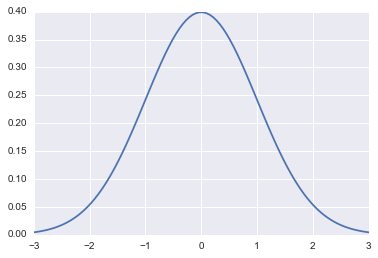

In [217]:
sns.plt.plot(x,y)

In [219]:
log_y = np.log(y)

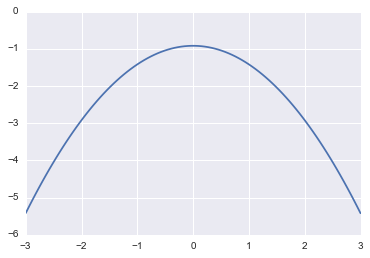

In [220]:
sns.plt.plot(x, log_y)

In [221]:
squar_y = y * y

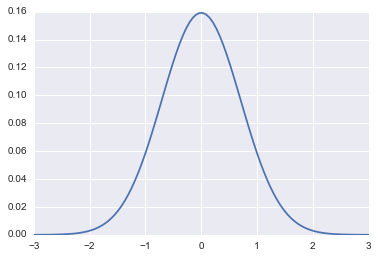

In [222]:
sns.plt.plot(x, squar_y)

## logistic

In [1]:
import numpy as np

In [2]:
N = 100
D = 2

In [3]:
X = np.random.randn(N, D)

In [4]:
X[0]

array([-1.09460797,  0.77611705])

In [5]:
X[:50, :] = X[:50, :] - 2*np.ones((50,D))

In [6]:
X[0]

array([-3.09460797, -1.22388295])

In [7]:
X[50:, :] = X[50:, :] + 2*np.ones((50, D))

In [32]:
X[0]

array([-3.09460797, -1.22388295])

In [33]:
X

array([[-3.09460797, -1.22388295],
       [-1.85694746, -2.96521385],
       [-3.19746189, -1.34916859],
       [-4.21130155, -2.21003089],
       [-2.96862735,  0.17410949],
       [-1.71653279, -1.26340179],
       [-3.40668005,  0.13175914],
       [-0.55510237, -0.90495622],
       [-3.58553397, -1.94775111],
       [-1.35235069, -0.59871431],
       [-0.69381335, -1.03667929],
       [-2.34996084, -3.19194379],
       [-4.46878418, -2.42648397],
       [-2.98985864, -2.24585402],
       [-2.97964461, -1.74981333],
       [-1.98102993, -2.09782076],
       [-2.52146891, -2.4886781 ],
       [-2.99636112, -3.76110225],
       [-1.57057041, -3.17323462],
       [-1.88585935, -2.63767718],
       [-1.66675761, -0.865735  ],
       [-1.9713574 , -1.05412651],
       [-0.76331653, -0.939845  ],
       [-0.64318313, -2.72340746],
       [-1.6611602 , -0.39123348],
       [-2.78180514, -0.42406616],
       [-1.85112236, -1.03075703],
       [ 0.53736747, -2.12648289],
       [-2.60045166,

In [9]:
T = np.array([0]*50+[1]*50)

In [10]:
ones = np.array([[1]*N]).T

In [11]:
Xb = np.concatenate((ones,X), axis=1)

In [12]:
w = np.random.randn(D+1)

In [13]:
z = Xb.dot(w)

In [14]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [15]:
Y = sigmoid(z)

In [16]:
# T: 實際值
# Y: 預測值
def cross_entropy(T, Y):
    return -sum(T*np.log(Y)+(1-T)*np.log(1-Y))

In [17]:
cross_entropy(T,Y)

82.248483442891001

In [18]:
T[0]

0

In [19]:
Y[0]

0.69894979687397873

In [20]:
np.log(1-Y[0])

-1.2004782403467085

In [21]:
np.log(1)

0.0

In [22]:
w2 = np.array([0, 4, 4])

In [23]:
z2 = Xb.dot(w2)

In [24]:
Y2 = sigmoid(z2)

In [25]:
cross_entropy(T, Y2)

0.021672366099269647

# visulization 

In [26]:
%matplotlib inline
import seaborn as sns

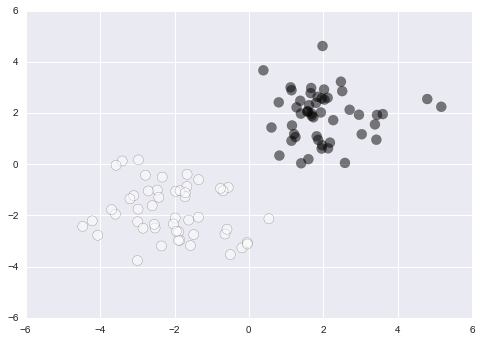

In [31]:
sns.plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)